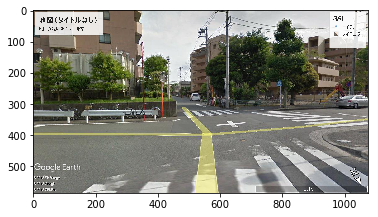

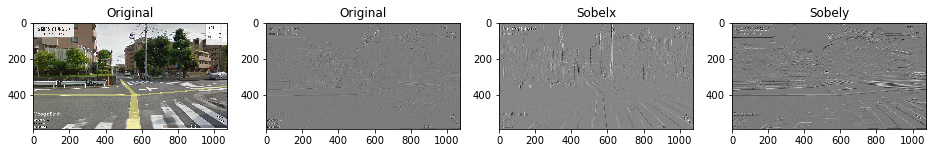

In [1]:
import cv2
img= cv2.imread('googlearth.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img) 

cvimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(cvimg)

import cv2
laplacian =cv2.Laplacian(gray,cv2.CV_64F)
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(16,8))
plt.subplot(1,4,1),plt.imshow(cvimg,cmap='gray');plt.title('Original')
plt.subplot(1,4,2),plt.imshow(laplacian,cmap='gray');plt.title('Original')
plt.subplot(1,4,3),plt.imshow(sobelx,cmap='gray');plt.title('Sobelx')
plt.subplot(1,4,4),plt.imshow(sobely,cmap='gray');plt.title('Sobely')
plt.show()


import cv2

# Haar-like特徴分類器の読み込み
face_cascade = cv2.CascadeClassifier('C:\opencv-master\data\haarcascades\haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier('C:\opencv-master\data\haarcascades\haarcascade_smile.xml')

faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    # 検知した顔を矩形で囲む
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 顔画像（グレースケール）
    roi_gray = gray[y:y+h, x:x+w]
    # 顔ｇ増（カラースケール）
    roi_color = img[y:y+h, x:x+w]
    # 顔の中から目を検知
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smilecounter=0
    for (ex,ey,ew,eh) in eyes:
         # 検知した目を矩形で囲む
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        smilecounter +=1
    print('笑顔度数:' + str(smilecounter))
#画像のサイズ取得
height = img.shape[0]
width = img.shape[1]

#画像のアスペクト比を維持したまま表示
#cv2.namedWindow("image", cv2.WINDOW_KEEPRATIO | cv2.WINDOW_NORMAL)

#画像のサイズをWINDOW_NORMALでユーザーが変更できるようにする.
cv2.namedWindow("image",cv2.WINDOW_NORMAL)

#画像表示        
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()